# Принятие решений в бизнесе

**Заказчик**
Крупный интернет-магазин

**Цель исследования**
1. Приоритизировать гипотезы из списка, предоставленных отделом маркетинга;
2. Проанализировать результаты проведенного А/В-тестирования и аргументировать решение по результатам теста.

**Задачи 1 части исследования:**
1. Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
2. Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
3. Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

**Задачи 2 части исследования:**
1. Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
2. Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
3. Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
4. Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.
5. Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения.
6. Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
7. Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
8. Построить точечный график стоимостей заказов. Сделать выводы и предположения.
9. Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
10. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.
11. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
12. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.
13. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
14. Принять решение по результатам теста и объясните его. 

Варианты решений:

1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

**Описание данных**

Список гипотез (файл hypothesis.csv)
Hypothesis — краткое описание гипотезы;
Reach — охват пользователей по 10-балльной шкале;
Impact — влияние на пользователей по 10-балльной шкале;
Confidence — уверенность в гипотезе по 10-балльной шкале;
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. 

Информация о заказах пользователей в интернет-магазине (файл orders.csv):
transactionId — идентификатор заказа;
visitorId — идентификатор пользователя, совершившего заказ;
date — дата, когда был совершён заказ;
revenue — выручка заказа;
group — группа A/B-теста, в которую попал заказ.

Информация о посещениях пользователями интернет-магазина (файл visitors.csv):
date — дата;
group — группа A/B-теста;
visitors — количество пользователей в указанную дату в указанной группе A/B-теста.

In [1]:
#импорт библиотек

import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import scipy.stats as stats
pd.options.display.max_colwidth = 130

# Часть 1: Приоритезация гипотез

In [2]:
data = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
data.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [4]:
data['ICE'] = (data['Impact'] * data['Confidence']) / data['Efforts']
ICE = data[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)
round(ICE, 2)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


**По ICE лидируют следующие гипотезы:** 

- "Запустить акцию, дающую скидку на товар в день рождения"
- "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
- "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета:

In [5]:
data['RICE'] = (data['Reach'] * data['Impact'] * data['Confidence']) / data['Efforts']
data[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


По RICE лидируют следующие гипотезы:

- "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
- "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
- "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"

У 7-ой гипотезы самое большое значение, которое равно 112, в то время как у остальных гипотез оно меньше, причем с большим отрывом от первой - например, у следующей гипотезы оно меньше ровно в 2 раза. Reach помогает нам понять, как много пользователей затронет гипотеза.

У ICE и RICE отличается формула одним параметром. И если этот параметр у гипотезы большой, то и RICE будет выше соответственно.

Нумерация гипотез ICE:

- 8
- 0
- 7
- 6
- 2

Нумерация гипотез RICE:

- 7
- 2
- 0
- 6
- 8

Приоритизация разная, т.к. формулы разные, одна учитывает охват, а другая — нет.

**Выводы по приоритезации гипотез**

Изучен файл с 9 гипотезами по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Применен фреймворк ICE для приоритизации гипотез. Самые топовые гипотезы по ICE - это гипотезы "Запустить акцию, дающую скидку на товар в день рождения", "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей", "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

Применен фреймворк RICE для приоритизации гипотез. Самые топовые гипотезы по RICE - гипотезы "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа", "Добавить два новых канала увеличения трафика, что позволит привлекать на 30% больше пользователей". На первом месте уже гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". Это связано с тем, что ее параметр Reach равен 10, в то время как у остальных гипотез он меньше. Reach помогает нам понять, скольких пользователей затронет гипотеза.

# Часть 2: Анализ A/B-теста

## Предобработка данных


In [6]:
# загрузка данных
orders = pd.read_csv('/datasets/orders.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [7]:
# смотрим инфо о данных
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
#проверим наличие дубликатов

orders.duplicated().sum()

0

дубликатов нет

In [9]:
 # проверим на нулевые значения
    
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

нулевых значений нет

In [10]:
# преобразуем столбец "дата" в формат datetime

orders['date'] = pd.to_datetime(orders['date'], format='%Y.%m.%d')

In [11]:
# проверим на попадание в обе группы
duplicated_users = orders.groupby('visitorId').agg({'group': ['nunique', 'unique']})
duplicated_users.columns = ['groups', 'group_names']
duplicated_users = duplicated_users.query('groups > 1')
display(duplicated_users.head())

,groups,group_names
visitorId,,
8300375,2,"[B, A]"
199603092,2,"[A, B]"
232979603,2,"[B, A]"
237748145,2,"[B, A]"
276558944,2,"[B, A]"


Пересечения обнаружены, но делать с ними ничего не будем.



In [12]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [13]:
# проверим на дубликаты

visitors.duplicated().sum()

0

дубликатов нет


In [14]:
 # проверим на нулевые значения

visitors.isna().sum()


date        0
group       0
visitors    0
dtype: int64

нулевых значений нет

In [15]:
# преобразуем столбец "дата" в формат datetime

visitors['date'] = pd.to_datetime(visitors['date'])

In [16]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и даем столбцам названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


## График кумулятивной выручки по группам 

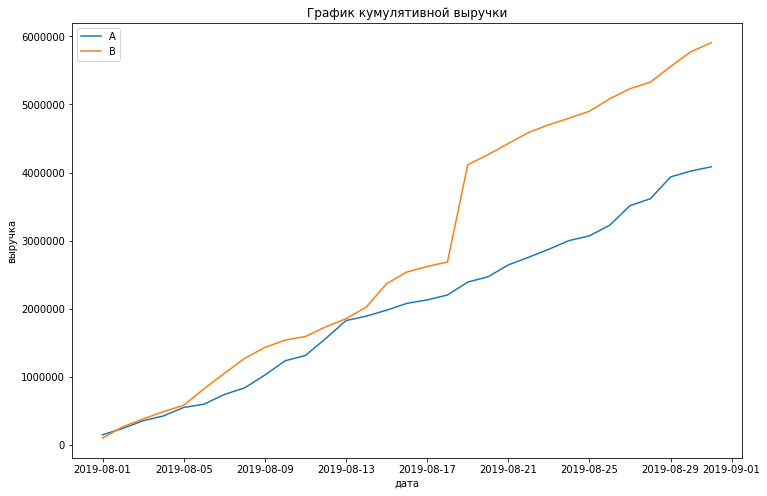

In [17]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(12, 8))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.xlabel('дата')
plt.ylabel('выручка')
plt.title('График кумулятивной выручки');
plt.legend();
plt.ticklabel_format(axis = 'y', style = 'plain')

Выручка растет почти равномерно. В группе B наблюдается резкий скачок на 19 дне теста (возможно выброс), но позже рост линейный. 

## График кумулятивного среднего чека по группам


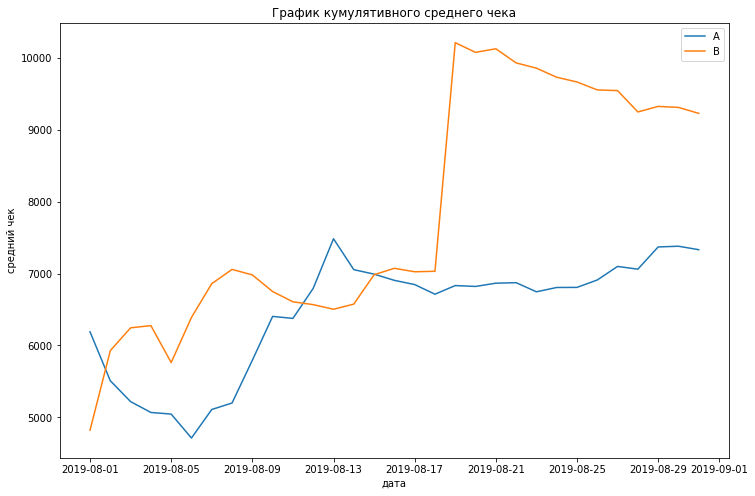

In [18]:
plt.figure(figsize=(12, 8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('дата')
plt.ylabel('средний чек')
plt.title('График кумулятивного среднего чека')
plt.legend();

Покупки 18 числа в группе В сильно отразились на среднем чеке - срежний чек скакнул до 10000, после 19 числа начал падать, что также указывает на наличие отдельных выбросов в сумме или количестве заказов.

Средний чек группы А относительно стабилен вокруг значения 7000.

## График относительного изменения кумулятивного среднего чека группы B к группе A 

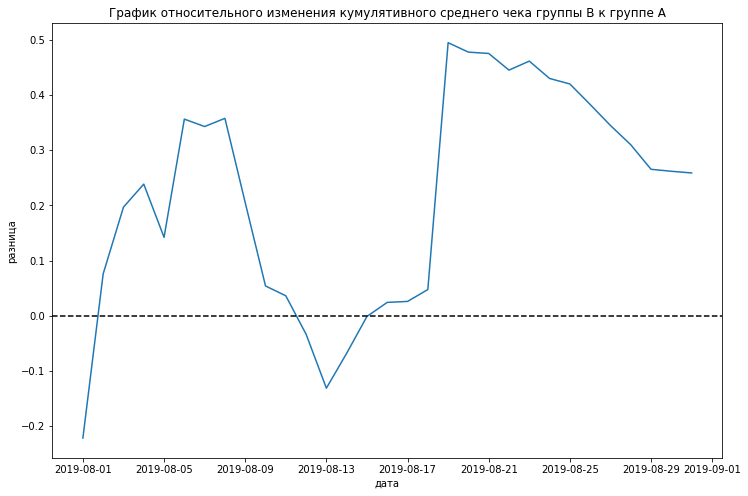

In [19]:
#собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(12, 8))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('дата')
plt.ylabel('разница')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A');

График сильно "скачет", что также намекает на наличие выбросов и аномалий, поэтому пока не будем делать заключений о превосходстве той или иной группы.

## График кумулятивного среднего количества заказов на посетителя по группам 

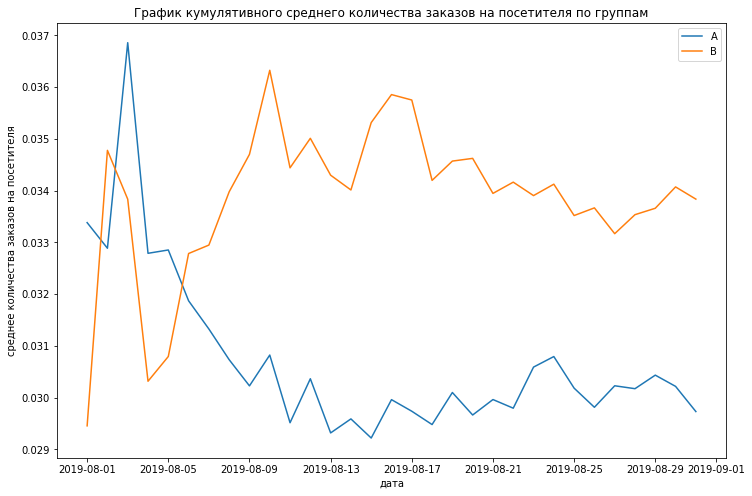

In [20]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(12, 8))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xlabel('дата')
plt.ylabel('среднее количества заказов на посетителя')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам');

После пика у обоех групп А-конверсия находится в пределах 0,029 и до 0,031. В-конверсия от 0,037 и до 0,033. B-конверсия пока выглядит лучше.



##  График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

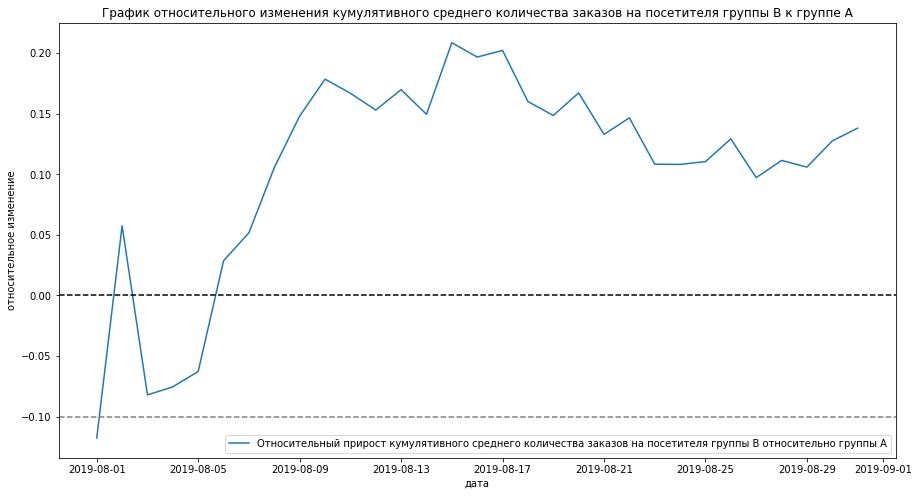

In [21]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15, 8))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")

plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.xlabel('дата')
plt.ylabel('относительное изменение')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A');

Сначала кумулятивное среднее количество заказов на посетителя в группе В уступало, затем вырвалось вперед и с 9 числа установилось на уровне +10/20% от группы А.



## Точечный график количества заказов по пользователям

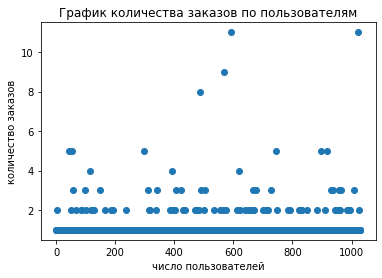

In [22]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.xlabel('число пользователей')
plt.ylabel('количество заказов')
plt.title('График количества заказов по пользователям');

Большинство пользователей сделали 1-2 покупки, но есть и те, кто сделал более 10 заказов. 



## 95-й и 99-й перцентили количества заказов на пользователя. Выбор границы для определения аномальных пользователей

In [23]:
np.percentile(ordersByUsers['orders'], [95, 99])


array([2., 4.])

Не более 5% пользователей совершали больше 2-х покупок в течение тестирования. И только 1% - четыре и более.
Примем за верхнюю границу 4 заказа на одного пользователя.

## Точечный график стоимостей заказов

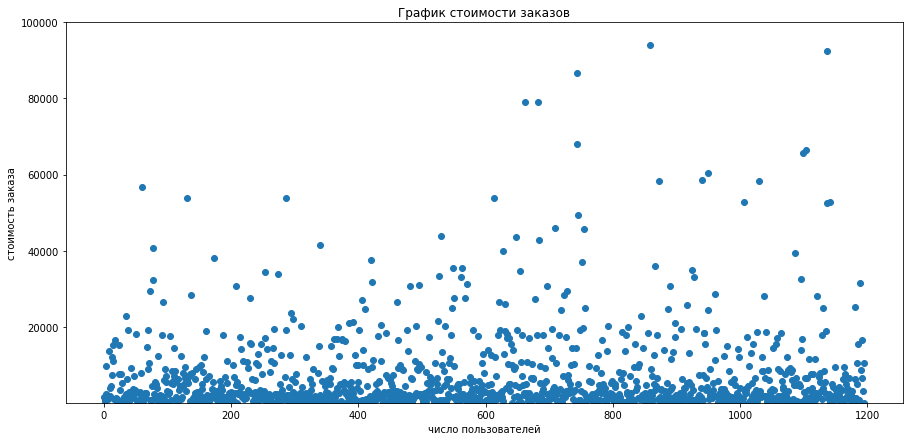

In [24]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15, 7))
plt.scatter(x_values, orders['revenue'])
plt.ticklabel_format(axis = 'y', style = 'plain')
plt.ylim([50, 100000])
plt.xlabel('число пользователей')
plt.ylabel('стоимость заказа')
plt.title('График стоимости заказов');

Судя по графикам, большинство покупателей тратят не больше 25-30 т.р.

## 95-й и 99-й перцентили стоимости заказов. Выбор границы для определения аномальных заказов.

In [25]:
np.percentile(orders['revenue'], [95, 99])


array([28000. , 58233.2])


Всего 5% заказов дороже 28 т.р. Определяем границу по величине 99% перцентиля (58233).

## Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Сформулируем гипотезы.

- H0: различий в среднем количестве заказов на посетителя между группами нет.
- H1: различия в среднем количестве заказов на посетителя между группами есть.

Уровень значимости alpha = 0.05
Так как данные о продажах и средних чеках редко бывают нормально распределены (это классический пример переменных, подверженных выбросам), для проверки гипотез будем использовать непараметрический тест Уилкоксона-Манна-Уитни.

In [26]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [27]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')] 
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
alpha = .05 
results = stats.mannwhitneyu(sampleA, sampleB)


print('p-значение: ', "{0:.3f}".format(results.pvalue))

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

print('относительный выигрыш группы B:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-значение:  0.017
Отвергаем нулевую гипотезу
относительный выигрыш группы B: 0.138


Метрика группы B значительно больше, статзначимость есть.

## Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Сформулируем гипотезы.

H0: различий в среднем чеке между группами нет.

H1: различия в среднем чеке между группами есть.

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов, также найдём относительные различия в среднем чеке между группами.

In [28]:
alpha = .05 
results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])


print('p-значение: ', "{0:.3f}".format(results.pvalue))

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
print('отношение средний чек группы B / средний чек группы A:', "{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-значение:  0.729
Не получилось отвергнуть нулевую гипотезу
отношение средний чек группы B / средний чек группы A: 0.259


p-value больше 0.05. Мы не можем отвергнуть нулевую гипотезу потому, что в среднем чеке нет различий. 

## Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

In [29]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > ordersByUsers['orders'].quantile(0.95)]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > ordersByUsers['orders'].quantile(0.95)]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > orders['revenue'].quantile(0.95)]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

abnormalUsers.shape

(74,)

In [30]:
abnormalUsers.value_counts().count()/len(orders['visitorId'].unique())

0.07177497575169738

Сформулируем гипотезы.

- H0: различий в среднем количестве заказов на посетителя между группами нет.
- H1: различия в среднем количестве заказов на посетителя между группами есть.

In [31]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


alpha = .05 
results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)


print('p-значение: ', "{0:.3f}".format(results.pvalue))

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

print('относительный выигрыш группы B:', "{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-значение:  0.013
Отвергаем нулевую гипотезу
относительный выигрыш группы B: 0.173


Метрика группы B снова превышает метрику группы А со статзначимостью.

## Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Воспользуемся критерием Манна-Уитни
Сформулируем гипотезы.

H0: различий в среднем чеке между группами нет.

H1: различия в среднем чеке между группами есть.

In [32]:
alpha = .05 
results = stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )

print('p-значение: ', "{0:.3f}".format(results.pvalue))
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
print('отношение средний чек группы B / средний чек группы A:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-значение:  0.738
Не получилось отвергнуть нулевую гипотезу
отношение средний чек группы B / средний чек группы A: -0.020


p-value значительно больше 0.05. Мы не можем отвергнуть нулевую гипотезу, в среднем чеке нет различий. При этом средний чек группы B стал меньше среднего чека группы A, слишком дорогие заказы (похожие на выбросы) повлияли на результаты A/B-теста.

## Решение по результатам теста

По результатам теста принимаем решение остановить тест и зафиксировать победу группы В.
Обнаружены статистически значимые различия в конверсии между группами, прирост конверсии в группе В относительно группы А составил около 17%.

Статистически значимых различий в среднем чеке не обнаружено, прирост среднего чека группы В также незначительный и составляет 2% над группой А, по очищенным данным различия еще меньше.

Это говорит о том, что, несмотря на то, что средний чек покупки не изменился, общее количество покупок выросло, следовательно выросла целевая метрика - выручка.